In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
import pandas as pd

from SAES.plots.boxplot import boxplot
from SAES.plots.boxplot import boxplot_all_instances
from SAES.plots.boxplot import boxplots_all_metrics_instances
from SAES.plots.critical_distance_plot import CDplot
from SAES.plots.critical_distance_plot import CDplot_all_metrics
from SAES.latex_generation.latex_skeleton import latex_all_metrics
from SAES.latex_generation.latex_skeleton import latex_selected
from SAES.latex_generation.latex_skeleton import latex
from SAES.utils.csv_processor import obtain_list_metrics
from SAES.utils.csv_processor import obtain_list_instances
from SAES.plots.boxplot import boxplot_all_instances_grid

In [2]:
# Load the experiment data
experimentData = pd.read_csv('ZCATSummary.csv')
metrics = pd.read_csv('multiobjectiveMetrics.csv')

metrics_list = obtain_list_metrics(metrics)
instances = obtain_list_instances(experimentData)

# EP

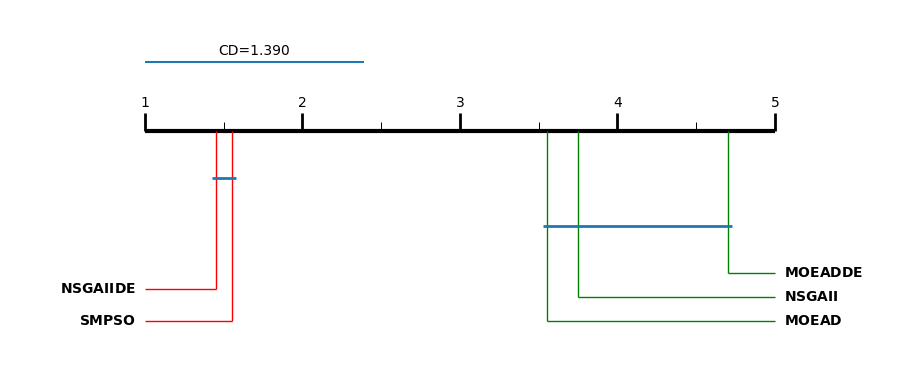

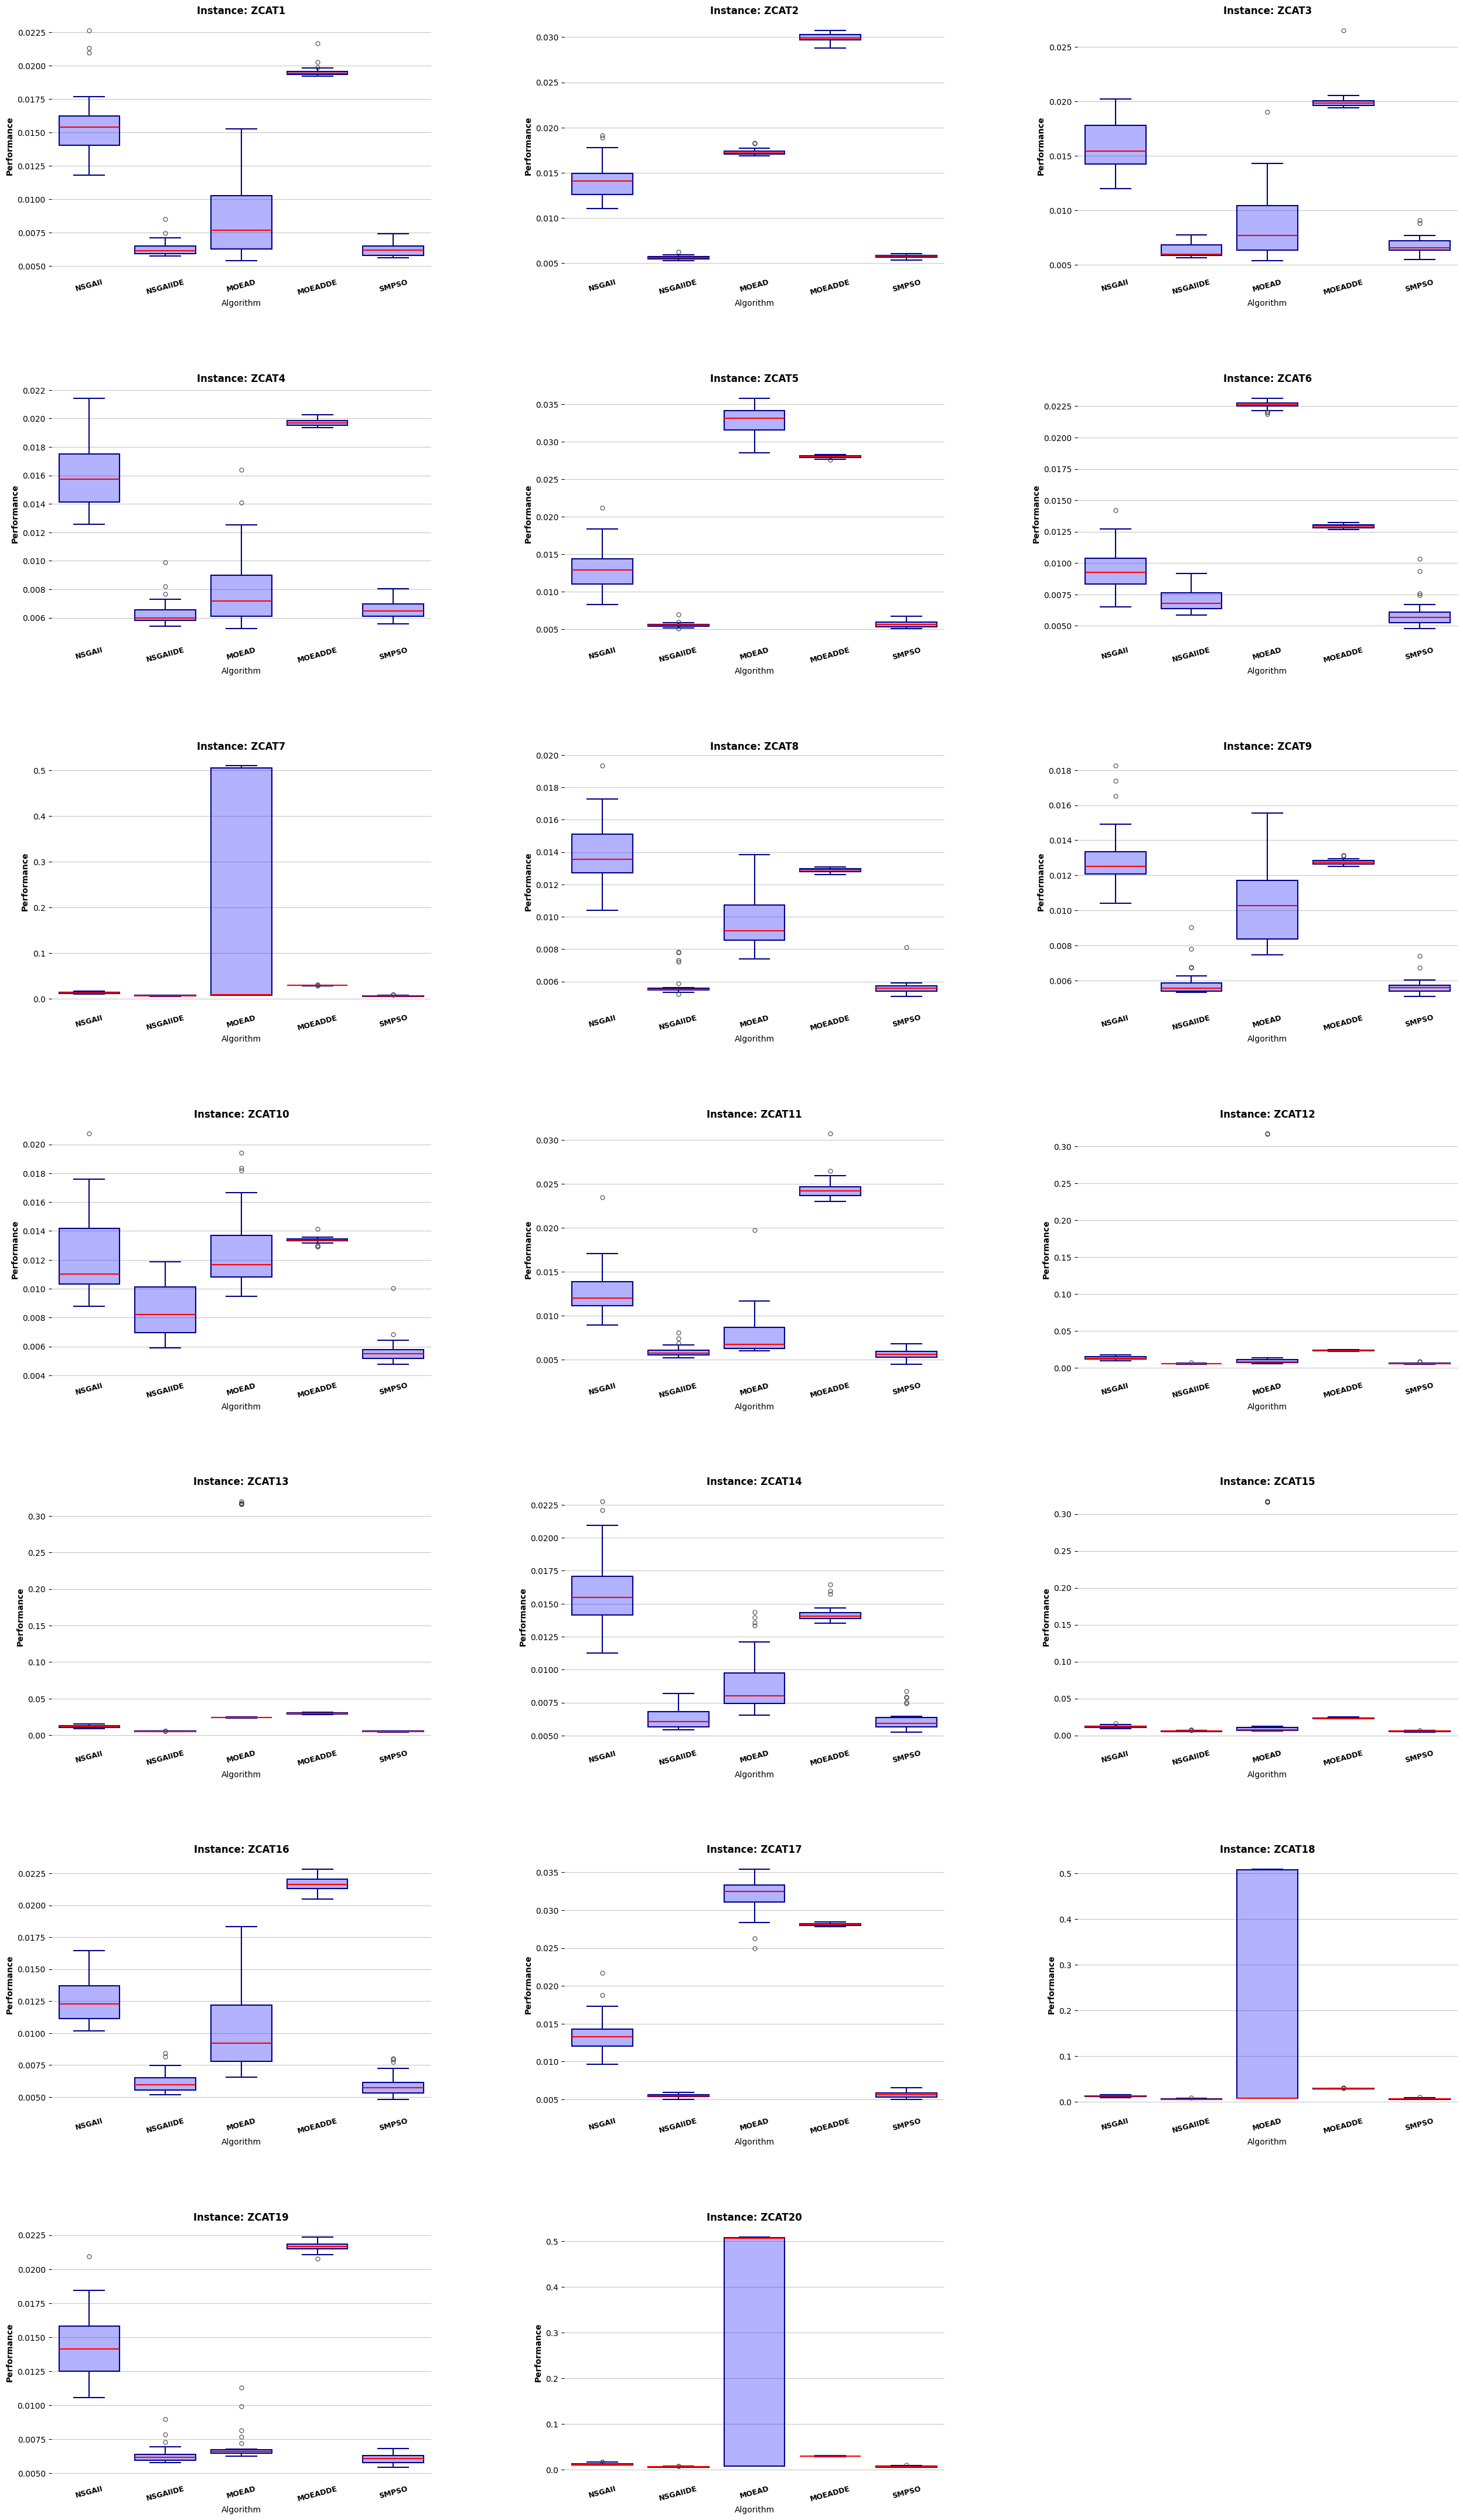

In [3]:
CDplot(experimentData, metrics, "EP", show=True)
boxplot_all_instances_grid(experimentData, metrics, "EP", show=True)